In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the MLP with one hidden layer
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        out = self.sigmoid(out)
        return out
    
    def predict(self, x):
        max_value = torch.max(x)
        max_indices = (x == max_value)
        y = torch.zeros_like(x)
        y[max_indices] = 1
        return y

# Define the training function
def train(model, inputs, targets, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(num_epochs):
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

    return model, losses

In [20]:
# Define the input and target tensors for the 8-3-8 task
inputs = torch.eye(8)
targets = inputs.clone()

# Create and train the model
model = MLP(8, 3, 8)
model, losses = train(model, inputs, targets, num_epochs=10000, learning_rate=0.1)



Epoch 100/100000, Loss: 0.21633683145046234
Epoch 200/100000, Loss: 0.18385452032089233
Epoch 300/100000, Loss: 0.15945392847061157
Epoch 400/100000, Loss: 0.14146891236305237
Epoch 500/100000, Loss: 0.12886402010917664
Epoch 600/100000, Loss: 0.1205984354019165
Epoch 700/100000, Loss: 0.11541137099266052
Epoch 800/100000, Loss: 0.11220740526914597
Epoch 900/100000, Loss: 0.11020274460315704
Epoch 1000/100000, Loss: 0.10890164971351624
Epoch 1100/100000, Loss: 0.10801559686660767
Epoch 1200/100000, Loss: 0.10737068951129913
Epoch 1300/100000, Loss: 0.10686685889959335
Epoch 1400/100000, Loss: 0.10644428431987762
Epoch 1500/100000, Loss: 0.10606785863637924
Epoch 1600/100000, Loss: 0.10571304708719254
Epoch 1700/100000, Loss: 0.10535840690135956
Epoch 1800/100000, Loss: 0.10495274513959885
Epoch 1900/100000, Loss: 0.10454490780830383
Epoch 2000/100000, Loss: 0.10412853956222534
Epoch 2100/100000, Loss: 0.1037018820643425
Epoch 2200/100000, Loss: 0.10327055305242538
Epoch 2300/100000, Lo

KeyboardInterrupt: 

In [14]:
losses

[<function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,
 <function Tensor.item>,


In [10]:
import matplotlib.pyplot as plt

TypeError: float() argument must be a string or a real number, not 'builtin_function_or_method'

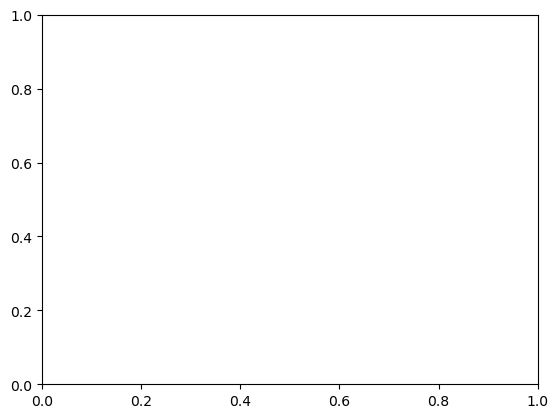

In [11]:
# Plot the learning curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
# Print the resulting input and output values
print('Input:', inputs)
print('Output:', model(inputs))

Input: tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])
Output: tensor([[1.5609e-01, 1.5290e-01, 1.6570e-01, 1.5807e-01, 6.8846e-02, 7.9733e-02,
         1.6259e-01, 1.6186e-01],
        [1.4566e-01, 1.6288e-01, 1.1775e-01, 1.4715e-01, 1.3435e-01, 5.5071e-02,
         1.2889e-01, 1.9336e-01],
        [1.5207e-01, 1.2445e-01, 2.3003e-01, 1.5198e-01, 2.5159e-02, 1.4478e-01,
         2.0281e-01, 1.0176e-01],
        [1.6878e-01, 1.6547e-01, 1.7698e-01, 1.7277e-01, 7.1966e-02, 7.2860e-02,
         1.7097e-01, 1.8573e-01],
        [3.6786e-02, 9.5276e-02, 5.7567e-03, 3.1776e-02, 8.6082e-01, 1.7725e-02,
         1.5946e-02, 1.1469e-01],
        [1.9521e-02, 1.0081e-02, 1.0031e-01, 1.4038e-02, 1.0164e-03, 8.60

In [ ]:
# Visualize the states of the hidden neurons
hidden_states = model.hidden(inputs).detach()
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(hidden_states[i].reshape(1, 3), cmap='gray')
    plt.axis('off')
plt.show()